In [5]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt


In [6]:
def treinar_modelo(env, num_passos_treinamento, veses):
    """Treina o modelo usando PPO com o número de passos especificado."""
    model = PPO("MlpPolicy", env, verbose=1)
    rewards = []
    iterations = []

    for i in range(veses):
        # Treinamento do modelo com o número de passos especificado
        model.learn(total_timesteps=num_passos_treinamento)

        # Avaliação do modelo
        mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

        # Armazenamento das recompensas e iterações
        rewards.append(mean_reward)
        iterations.append((i + 1) * num_passos_treinamento)
        print(f"Iteração {i+1}: Recompensa média = {mean_reward}")

    return rewards, iterations

def plotar_grafico_linha(iterations, rewards):
    """Plota um gráfico de linha das recompensas médias."""
    plt.plot(iterations, rewards)
    plt.xlabel('Iterações')
    plt.ylabel('Recompensa média')
    plt.show()


In [7]:
# Criação do ambiente
env = gym.make('CartPole-v1')
env = DummyVecEnv([lambda: env])

# Definindo o número de passos de treinamento desejados
num_passos_treinamento = 2500
veses = 5

# Treinamento do modelo
rewards, iterations = treinar_modelo(env, num_passos_treinamento, veses)

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 360  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 291         |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009241029 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.00213    |
|    learning_rate        | 0.0003      |
|    loss                 | 8.86        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 54.3        |
-----------------------------------------
Iteração 1: Reco

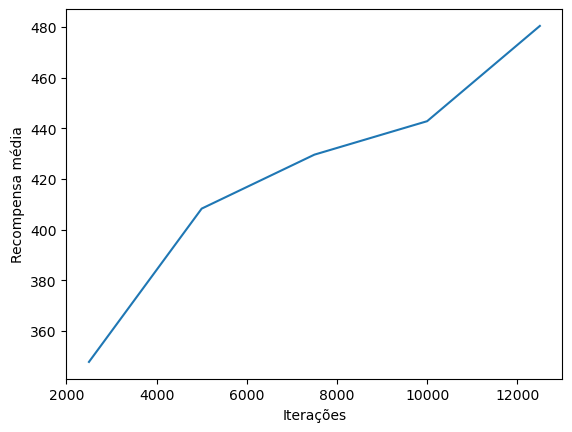

In [8]:
# Plotagem do gráfico de barras
plotar_grafico_linha(iterations, rewards)